<a href="https://colab.research.google.com/github/garciamilord/Data-Compression-SVD-/blob/main/datacompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

In [48]:
! wget https://raw.githubusercontent.com/garciamilord/Data-Compression-SVD-/main/jacketlife.jpg
# https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg
# github.com/garciamilord/NameandColorWebApp/blob/master/assets/multicolorgopher.jpeg

--2021-12-09 04:34:15--  https://raw.githubusercontent.com/garciamilord/Data-Compression-SVD-/main/jacketlife.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58069 (57K) [image/jpeg]
Saving to: ‘jacketlife.jpg’

jacketlife.jpg      100%[===================>]  56.71K  --.-KB/s    in 0.001s  

2021-12-09 04:34:15 (46.1 MB/s) - ‘jacketlife.jpg’ saved [58069/58069]



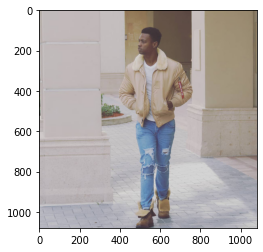

In [49]:
img = Image.open('jacketlife.jpg')
_= plt.imshow(img)

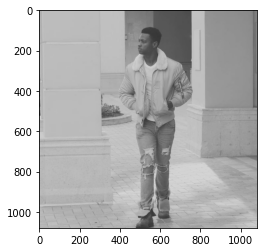

In [50]:
imggray = img.convert('LA')
_= plt.imshow(imggray)

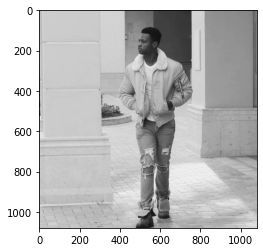

In [51]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_=plt.imshow(imgmat, cmap='gray')

In [52]:
U, sigma, V =np.linalg.svd(imgmat)

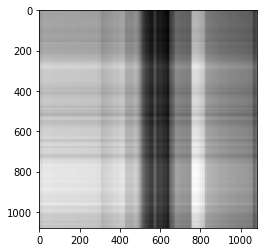

In [53]:
reconstimg = np.matrix(U[:,:1]) * np.diag(sigma[:1]) * np.matrix(V[:1,:])
_=plt.imshow(reconstimg, cmap='gray')

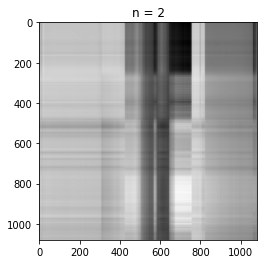

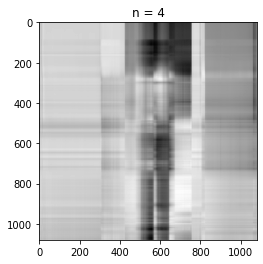

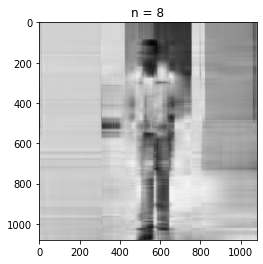

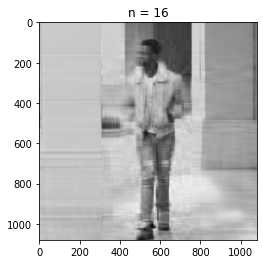

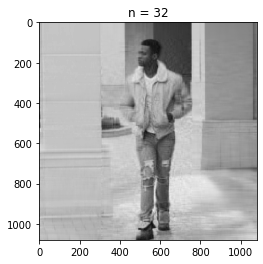

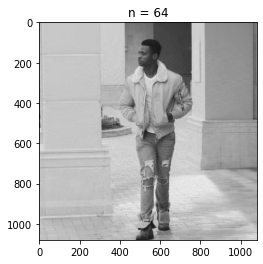

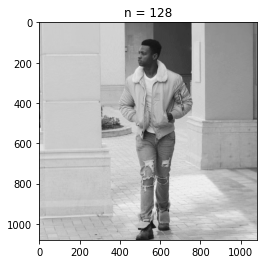

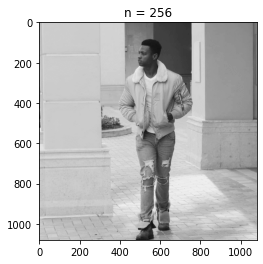

In [54]:
for i in [2,4,8,16,32,64,128,256]:
  reconstimg = np.matrix(U[:,:i]) * np.diag(sigma[:i]) * np.matrix(V[:i,:])
  plt.imshow(reconstimg, cmap='gray')
  title ="n = %s" % i
  plt.title(title)
  plt.show()

In [56]:
imgmat.shape

(1080, 1080)

In [57]:
full_rep = 1080*1080
full_rep

1166400

In [58]:
svd256_rep = 256 * 1080 +256 +256 *1080
svd256_rep

553216

In [59]:
svd64_rep/full_rep

0.21091906721536352